In [1]:
from fastcore.basics import Path, AttrDict

config = AttrDict(
    challenge_data_raw_dir = Path('../../data/1_dataset_raw/'),
    challenge_data_clean_dir = Path('../../data/2_dataset_clean/'),
    challenge_data_processed_dir = Path('../../data/3_dataset_processed/'),
    challenge_data_features_dir = Path('../../data/4_dataset_features/'),
    df_merged_small = Path('../../data/2_dataset_clean/df_merged_small.csv'),
    df_merged_medium = Path('../../data/2_dataset_clean/df_merged_medium.csv'),
    df_merged_large = Path('../../data/2_dataset_clean/df_merged_large.csv'),
    df_merged_full = Path('../../data/2_dataset_clean/df_merged_full.csv'),
    valid_ratio = 0.1,
    lag_steps = 5,
    tolerance= 6, # Default evaluation tolerance
)

# read df_merged_small
import pandas as pd
df_merged = pd.read_csv(config.df_merged_small)

df_merged

Timestamp  Eccentricity  Semimajor Axis (m)  \
0        2022-09-01 00:00:00.000000Z      0.000127        4.216594e+07   
1        2022-09-01 02:00:00.000000Z      0.005056        4.238466e+07   
2        2022-09-01 04:00:00.000000Z      0.005062        4.238501e+07   
3        2022-09-01 06:00:00.000000Z      0.005054        4.238422e+07   
4        2022-09-01 08:00:00.000000Z      0.005044        4.238313e+07   
...                              ...           ...                 ...   
1086955  2023-02-28 14:00:00.000000Z      0.000097        4.216560e+07   
1086956  2023-02-28 16:00:00.000000Z      0.000086        4.216585e+07   
1086957  2023-02-28 18:00:00.000000Z      0.000074        4.216590e+07   
1086958  2023-02-28 20:00:00.000000Z      0.000068        4.216563e+07   
1086959  2023-02-28 22:00:00.000000Z      0.000075        4.216521e+07   

         Inclination (deg)  RAAN (deg)  Argument of Periapsis (deg)  \
0                 0.118065   89.710324                   202.940616   
1                 0.118038   89.650304                    60.229587   
2                 0.118114   89.518050                    60.424355   
3                 0.118364   89.395612                    60.350090   
4                 0.118658   89.353924                    60.060612   
...                    ...         ...                          ...   
1086955           0.202295   76.581292                   105.475645   
1086956           0.202724   76.572324                   112.477268   
1086957           0.201503   76.418511                   113.179844   
1086958           0.201734   76.512042                   102.841679   
1086959           0.201762   76.578121                    87.897590   

         True Anomaly (deg)  Latitude (deg)  Longitude (deg)  Altitude (m)  \
0                216.180960       -0.004704       168.980008  3.579214e+07   
1                 29.090881       -0.006828       169.036746  3.581902e+07   
2                 59.091844       -0.007215       169.018089  3.589587e+07   
3                 89.219001       -0.005842       168.866409  3.600208e+07   
4                119.326647       -0.003103       168.560755  3.610888e+07   
...                     ...             ...              ...           ...   
1086955           54.784362       -0.003213      -130.995683  3.578511e+07   
1086956           77.874419       -0.045222      -130.995132  3.578695e+07   
1086957          107.405821       -0.074780      -130.997097  3.578869e+07   
1086958          147.728412       -0.083991      -131.001247  3.578992e+07   
1086959          192.683152       -0.070752      -131.006627  3.579016e+07   

                X (m)         Y (m)          Z (m)     Vx (m/s)     Vy (m/s)  \
0       -3.608303e+07  2.182526e+07   74580.151140 -1590.894015 -2630.634553   
1       -4.219026e+07  7.579635e+05   86926.450274   -62.865297 -3079.607106   
2       -3.696135e+07 -2.051694e+07   75836.682875  1480.580493 -2694.723791   
3       -2.184975e+07 -3.631348e+07   44344.181267  2619.892981 -1594.478385   
4       -9.333845e+05 -4.247677e+07     940.970165  3058.128946   -80.689078   
...               ...           ...            ...          ...          ...   
1086955 -2.306152e+07 -3.529735e+07   50279.886539  2573.928194 -1681.980257   
1086956 -2.262640e+06 -4.210432e+07  -26807.586644  3070.192414  -165.240527   
1086957  1.914591e+07 -3.756949e+07  -96478.786471  2739.408169  1395.816744   
1086958  3.539775e+07 -2.291559e+07 -140014.872786  1670.844246  2580.772766   
1086959  4.211621e+07 -2.090091e+06 -145966.872130   152.341143  3070.619859   

          Vz (m/s)  ObjectID  TimeIndex     EW     NS  
0         3.250794       545          0  SS-NK  SS-NK  
1         0.090788       545          1    NaN    NaN  
2        -3.098809       545          2    NaN    NaN  
3        -5.446713       545          3    NaN    NaN  
4        -6.334788       545          4    NaN    NaN  
...            ...       ...        ...    ...    .

In [2]:
list_object_id = list(df_merged['ObjectID'].unique())

In [3]:
def get_df_merged_query(df_merged, list_object_id, position):
    # Retrieve the ObjectID from the list based on the given position
    object_id = list_object_id[position]
    print("Object id is : {}".format(object_id))
    
    # Query df_merged where ObjectID matches the retrieved object_id
    # Note: @object_id inside the query string is used to reference the variable object_id
    return df_merged.query('ObjectID == @object_id')

df_merged_query = get_df_merged_query(df_merged, list_object_id, position = 10)


Object id is : 592


In [4]:
df_merged_query.to_csv("df_merged_query.csv")

In [5]:
df_merged_query

Timestamp  Eccentricity  Semimajor Axis (m)  \
21720  2022-09-01 00:00:00.000000Z      0.000250        4.216543e+07   
21721  2022-09-01 02:00:00.000000Z      0.005789        4.193310e+07   
21722  2022-09-01 04:00:00.000000Z      0.005787        4.193342e+07   
21723  2022-09-01 06:00:00.000000Z      0.005796        4.193293e+07   
21724  2022-09-01 08:00:00.000000Z      0.005805        4.193213e+07   
...                            ...           ...                 ...   
23887  2023-02-28 14:00:00.000000Z      0.000039        4.216616e+07   
23888  2023-02-28 16:00:00.000000Z      0.000040        4.216617e+07   
23889  2023-02-28 18:00:00.000000Z      0.000029        4.216584e+07   
23890  2023-02-28 20:00:00.000000Z      0.000017        4.216552e+07   
23891  2023-02-28 22:00:00.000000Z      0.000019        4.216545e+07   

       Inclination (deg)  RAAN (deg)  Argument of Periapsis (deg)  \
21720           0.133954   99.167794                    55.807238   
21721           0.133921   99.142065                    43.105171   
21722           0.133919   99.076111                    43.091111   
21723           0.134021   98.995690                    43.268020   
21724           0.134221   98.942956                    43.545865   
...                  ...         ...                          ...   
23887           0.209006   94.723067                   354.198329   
23888           0.209641   94.723317                     9.579411   
23889           0.210077   94.789995                    28.736337   
23890           0.210210   94.846959                    67.899072   
23891           0.210222   94.840813                   133.011639   

       True Anomaly (deg)  Latitude (deg)  Longitude (deg)  Altitude (m)  \
21720          166.881998        0.006409       -17.994883  3.579758e+07   
21721          209.607280       -0.004466       -18.079535  3.576569e+07   
21722          239.773518       -0.014110       -18.075446  3.567639e+07   
21723          269.918878       -0.019871       -17.915731  3.555373e+07   
21724          300.117239       -0.020089       -17.574391  3.543079e+07   
...                   ...             ...              ...           ...   
23887          351.011545       -0.029169        72.095909  3.578639e+07   
23888            5.712609        0.013302        72.096142  3.578637e+07   
23889           16.571229        0.052490        72.096211  3.578652e+07   
23890            7.433394        0.077734        72.095949  3.578666e+07   
23891          332.408703        0.082094        72.095576  3.578658e+07   

              X (m)         Y (m)          Z (m)     Vx (m/s)     Vy (m/s)  \
21720  3.316994e+07 -2.604882e+07  -66855.915503  1898.629506  2417.399632   
21721  4.171855e+07 -5.971255e+06  -94055.586889   425.914577  3037.953309   
21722  3.900844e+07  1.571355e+07  -95827.516438 -1162.956078  2845.757974   
21723  2.571032e+07  3.312485e+07  -71514.761189 -2446.544581  1876.310953   
21724  5.380389e+06  4.146128e+07  -27549.487207 -3068.460810   382.583254   
...             ...           ...            ...          ...          ...   
23887  7.370317e+06  4.151535e+07  -39264.360314 -3027.351400   537.443932   
23888 -1.443164e+07  3.961782e+07   40688.629858 -2888.983903 -1052.372617   
23889 -3.234590e+07  2.704790e+07  109902.609114 -1972.361572 -2358.689902   
23890 -4.154667e+07  7.191792e+06  149655.163637  -524.426670 -3029.608472   
23891 -3.955546e+07 -1.460161e+07  149135.382689  1064.776751 -2884.409181   

        Vz (m/s)  ObjectID  TimeIndex     EW     NS  
21720  -5.282670       592          0  SS-NK  SS-NK  
21721  -2.111076       592          1    NaN    NaN  
21722   1.634930       592          2    NaN    NaN  
21723   4.966098       592          3    NaN    NaN  
21724   6.961494       592          4    NaN    NaN  
...          ...       ...        ...    ...    ...  
23887  10.844443       592       2167    NaN    NaN  
23888  10.851788       592       2168    NaN    N

# Plot other features

In [6]:
import pandas as pd
import plotly.graph_objects as go

import pandas as pd
import plotly.graph_objects as go

def plot_orbital_parameter_with_events(df, parameter_name):
    # Ensure 'Timestamp' is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])

    # Extract the unique ObjectID (assuming all rows have the same ObjectID)
    object_id = df['ObjectID'].iloc[0]
    
    # Create the title with ObjectID and the parameter being plotted
    title = f'{parameter_name} Evolution for Object ID: {object_id} with NS and EW Events'

    # Create the base figure
    fig = go.Figure()

    # Add line for the specified orbital parameter
    fig.add_trace(go.Scatter(
        x=df['Timestamp'],
        y=df[parameter_name],
        mode='lines+markers',
        name=parameter_name,
        line=dict(color='blue'),
        marker=dict(size=4)  # Default marker size for the line plot
    ))
    
    # Add markers for NS events, ignoring NaN values, with increased size and a distinctive color
    for event in df['NS'].dropna().unique():
        df_event = df[df['NS'] == event]
        fig.add_trace(go.Scatter(
            x=df_event['Timestamp'],
            y=df_event[parameter_name],
            mode='markers',
            name=f'NS: {event}',
            marker=dict(symbol='circle', size=10, color='yellow')  # Larger, yellow markers for NS events
        ))
    
    # Add markers for EW events, ignoring NaN values, with increased size and a distinctive color
    for event in df['EW'].dropna().unique():
        df_event = df[df['EW'] == event]
        fig.add_trace(go.Scatter(
            x=df_event['Timestamp'],
            y=df_event[parameter_name],
            mode='markers',
            name=f'EW: {event}',
            marker=dict(symbol='x', size=10, color='magenta')  # Larger, magenta markers for EW events
        ))
    
    # Update plot layout
    fig.update_layout(
        title=title,
        xaxis_title='Timestamp',
        yaxis_title=parameter_name,
        legend_title='Event Type',
        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)  # Adjust legend position
    )

    fig.show()


In [ ]:


plot_orbital_parameter_with_events(df_merged_query, 'Eccentricity')
plot_orbital_parameter_with_events(df_merged_query, 'Semimajor Axis (m)')
plot_orbital_parameter_with_events(df_merged_query, 'Inclination (deg)')
plot_orbital_parameter_with_events(df_merged_query, 'RAAN (deg)')
plot_orbital_parameter_with_events(df_merged_query, 'Argument of Periapsis (deg)')
plot_orbital_parameter_with_events(df_merged_query, 'True Anomaly (deg)')
plot_orbital_parameter_with_events(df_merged_query, 'Latitude (deg)')
plot_orbital_parameter_with_events(df_merged_query, 'Longitude (deg)')
plot_orbital_parameter_with_events(df_merged_query, 'Altitude (m)')
plot_orbital_parameter_with_events(df_merged_query, 'X (m)')
plot_orbital_parameter_with_events(df_merged_query, 'Y (m)')
plot_orbital_parameter_with_events(df_merged_query, 'Z (m)')
plot_orbital_parameter_with_events(df_merged_query, 'Vx (m/s)')
plot_orbital_parameter_with_events(df_merged_query, 'Vy (m/s)')
plot_orbital_parameter_with_events(df_merged_query, 'Vz (m/s)')


#

# Plot with isolation of feature

### Eccentricity

In [19]:
list_of_20_object_id = list(df_merged['ObjectID'].unique())[:10]
list_of_column_names = df_merged.columns.tolist()
import pandas as pd
import plotly.graph_objects as go

def plot_eccentricity_features(df):
    # Ensure 'Timestamp' is in datetime format
    if not pd.api.types.is_datetime64_any_dtype(df['Timestamp']):
        df['Timestamp'] = pd.to_datetime(df['Timestamp'])
        
    # Find all columns that contain "Eccentricity" in the column name
    eccentricity_columns = [col for col in df.columns if "Eccentricity" in col]
    print("eccentricity_columns", eccentricity_columns)

    # Extract the unique ObjectID (assuming all rows have the same ObjectID)
    object_id = df['ObjectID'].iloc[0]
    
    # Create the base figure
    fig = go.Figure()

    for parameter_name in eccentricity_columns:
        # Create the title with ObjectID and the parameter being plotted
        title = f'{parameter_name} Evolution for Object ID: {object_id} with NS and EW Events'

        # Add line for the current eccentricity parameter
        fig.add_trace(go.Scatter(
            x=df['Timestamp'],
            y=df[parameter_name],
            mode='lines+markers',
            name=parameter_name,
            line=dict(color='blue'),
            marker=dict(size=4)  # Default marker size for the line plot
        ))

    # Add markers for NS events, ignoring NaN values, with increased size and a distinctive color
    for event in df['NS'].dropna().unique():
            df_event = df[df['NS'] == event]
            fig.add_trace(go.Scatter(
                x=df_event['Timestamp'],
                y=df_event["Eccentricity"],
                mode='markers',
                name=f'NS: {event}',
                marker=dict(symbol='circle', size=10, color='yellow')  # Larger, yellow markers for NS events
            ))
        
    # Add markers for EW events, ignoring NaN values, with increased size and a distinctive color
    for event in df['EW'].dropna().unique():
        df_event = df[df['EW'] == event]
        fig.add_trace(go.Scatter(
            x=df_event['Timestamp'],
            y=df_event["Eccentricity"],
            mode='markers',
            name=f'EW: {event}',
            marker=dict(symbol='x', size=10, color='magenta')  # Larger, magenta markers for EW events
            ))
    
    # Update plot layout for the last plotted parameter (consider adjusting if needed)
    fig.update_layout(
        title=title,
        xaxis_title='Timestamp',
        yaxis_title=parameter_name,
        legend_title='Event Type',
        legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01)  # Adjust legend position
    )

    fig.show()


In [21]:
for object_id in list_of_20_object_id:
    df_merged_query = df_merged.query("ObjectID == @object_id")
    
   # Create the new features
    df_merged_query['Eccentricity_Difference'] = df_merged_query['Eccentricity'].diff()
    df_merged_query['Eccentricity_Pct_Change'] = df_merged_query['Eccentricity'].pct_change() * 100
    
    
    
    
    
    plot_eccentricity_features(df_merged_query)

eccentricity_columns ['Eccentricity', 'Eccentricity_Difference', 'Eccentricity_Pct_Change']


/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/2454050592.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

eccentricity_columns ['Eccentricity', 'Eccentricity_Difference', 'Eccentricity_Pct_Change']


/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/2454050592.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/2454050592.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

eccentricity_columns ['Eccentricity', 'Eccentricity_Difference', 'Eccentricity_Pct_Change']


eccentricity_columns ['Eccentricity', 'Eccentricity_Difference', 'Eccentricity_Pct_Change']


/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/2454050592.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/2454050592.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

eccentricity_columns ['Eccentricity', 'Eccentricity_Difference', 'Eccentricity_Pct_Change']


/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/2454050592.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

eccentricity_columns ['Eccentricity', 'Eccentricity_Difference', 'Eccentricity_Pct_Change']


/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/2454050592.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

eccentricity_columns ['Eccentricity', 'Eccentricity_Difference', 'Eccentricity_Pct_Change']


/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/2454050592.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

eccentricity_columns ['Eccentricity', 'Eccentricity_Difference', 'Eccentricity_Pct_Change']


/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/2454050592.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

eccentricity_columns ['Eccentricity', 'Eccentricity_Difference', 'Eccentricity_Pct_Change']


eccentricity_columns ['Eccentricity', 'Eccentricity_Difference', 'Eccentricity_Pct_Change']


/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/273070369.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/2454050592.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [37]:
df_merged_query = df_merged.query("ObjectID == 1760")
df_merged_query.to_csv("df_merged_query.csv")

/var/folders/xf/y0x1jxvj7f1btzf3x9cjl9_80000gn/T/ipykernel_32417/3309120303.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



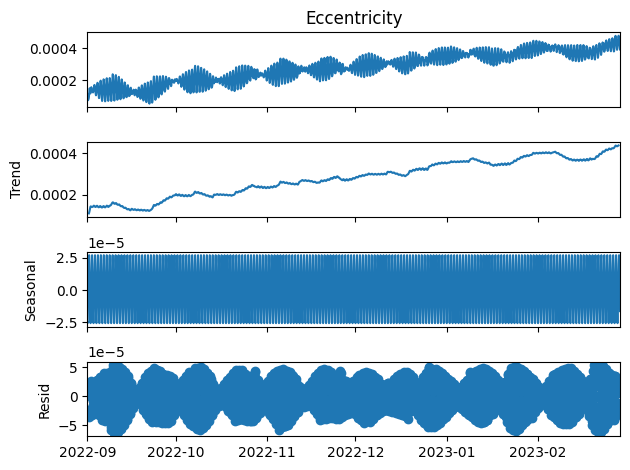

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Convert the "Timestamp" column to datetime and set it as the index
df_merged_query['Timestamp'] = pd.to_datetime(df_merged_query['Timestamp'])
df_merged_query.set_index('Timestamp', inplace=True)

# Ensure the dataset has a consistent frequency
df_merged_query = df_merged_query.asfreq(pd.infer_freq(df_merged_query.index))

# Perform seasonal decomposition to identify the trend, seasonal, and residual components
decomposition = seasonal_decompose(df_merged_query['Eccentricity'], model='additive', period=12)  # Adjust the period according to your data's seasonality

# Plot the decomposed components
decomposition_plot = decomposition.plot()
plt.show()


<Axes: xlabel='Timestamp'>

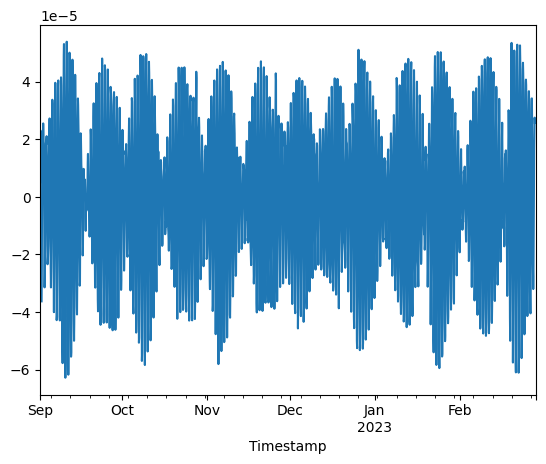

In [39]:
# Remove the seasonality from the "Eccentricity" data
eccentricity_deseasonalized = df_merged_query['Eccentricity'] - decomposition.seasonal - decomposition.trend

eccentricity_deseasonalized.plot()